## Data Set Information: ##

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images. Each of the patients is classified into two categories: normal <br> 
and abnormal. The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images. As a result, 44 continuous <br> feature pattern was created for each patient. The CLIP3 algorithm was used to generate classification rules from these patterns. The CLIP3 algorithm generated rules <br> 
that were 77.0% accurate (as compared with cardilogists' diagnoses).<br> 
<br> 
SPECTF is a good data set for testing ML algorithms; it has 267 instances that are descibed by 45 attributes.<br> 
<br> 
Predicted attribute: OVERALL_DIAGNOSIS (binary)<br> 
<br> 
NOTE: See the SPECT heart data for binary data for the same classification task.<br> 

### Attribute Information: ###

1. OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
2. F1R: continuous (count in ROI (region of interest) 1 in rest)
3. F1S: continuous (count in ROI 1 in stress)
4. F2R: continuous (count in ROI 2 in rest)
5. F2S: continuous (count in ROI 2 in stress)
6. F3R: continuous (count in ROI 3 in rest)
7. F3S: continuous (count in ROI 3 in stress)
8. F4R: continuous (count in ROI 4 in rest)
9. F4S: continuous (count in ROI 4 in stress)
10. F5R: continuous (count in ROI 5 in rest)
11. F5S: continuous (count in ROI 5 in stress)
12. F6R: continuous (count in ROI 6 in rest)
13. F6S: continuous (count in ROI 6 in stress)
14. F7R: continuous (count in ROI 7 in rest)
15. F7S: continuous (count in ROI 7 in stress)
16. F8R: continuous (count in ROI 8 in rest)
17. F8S: continuous (count in ROI 8 in stress)
18. F9R: continuous (count in ROI 9 in rest)
19. F9S: continuous (count in ROI 9 in stress)
20. F10R: continuous (count in ROI 10 in rest)
21. F10S: continuous (count in ROI 10 in stress)
22. F11R: continuous (count in ROI 11 in rest)
23. F11S: continuous (count in ROI 11 in stress)
24. F12R: continuous (count in ROI 12 in rest)
25. F12S: continuous (count in ROI 12 in stress)
26. F13R: continuous (count in ROI 13 in rest)
27. F13S: continuous (count in ROI 13 in stress)
28. F14R: continuous (count in ROI 14 in rest)
29. F14S: continuous (count in ROI 14 in stress)
30. F15R: continuous (count in ROI 15 in rest)
31. F15S: continuous (count in ROI 15 in stress)
32. F16R: continuous (count in ROI 16 in rest)
33. F16S: continuous (count in ROI 16 in stress)
34. F17R: continuous (count in ROI 17 in rest)
35. F17S: continuous (count in ROI 17 in stress)
36. F18R: continuous (count in ROI 18 in rest)
37. F18S: continuous (count in ROI 18 in stress)
38. F19R: continuous (count in ROI 19 in rest)
39. F19S: continuous (count in ROI 19 in stress)
40. F20R: continuous (count in ROI 20 in rest)
41. F20S: continuous (count in ROI 20 in stress)
42. F21R: continuous (count in ROI 21 in rest)
43. F21S: continuous (count in ROI 21 in stress)
44. F22R: continuous (count in ROI 22 in rest)
45. F22S: continuous (count in ROI 22 in stress)
<br>
- all continuous attributes have integer values from the 0 to 100<br>
- dataset is divided into:<br>
-- training data ("SPECTF.train" 80 instances)<br>
-- training data ("SPECTF.test" 187 instances)<br>

In [64]:
import numpy as np 
import pandas as pd
from pathlib import Path

project_path = Path("D:/9999_Github_MachineLearning/ML_experiments/ML_experiments/SPECTF_Heart_Data")
data_path = Path("Data")
random_seed = 42

test = pd.read_csv(project_path / data_path / "SPECTF.test")
train = pd.read_csv(project_path / data_path / "SPECTF.train")
test.shape, test.shape
# ((186, 45), (186, 45))

((186, 45), (186, 45))

In [65]:
X_test = test.iloc[:, 1:].to_numpy()
y_test = test.iloc[:, 0].to_numpy()
X_test.shape, y_test.shape
# ((186, 44), (186,))

((186, 44), (186,))

In [66]:
X_train = train.iloc[:, 1:].to_numpy()
y_train = train.iloc[:, 0].to_numpy()
X_train.shape, y_train.shape
# ((79, 44), (79,))

((79, 44), (79,))

## Helper Functions ##

In [67]:
from sklearn.metrics import recall_score, precision_score, PrecisionRecallDisplay

def show_precision_recall(X_test, y_test, y_pred, estimator, estimator_name, title):
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    print(f"Recall for {estimator_name}: {recall:.3f}")
    precision = precision_score(y_true=y_test, y_pred=y_pred)
    print(f"Precision for {estimator_name}: {precision:.3f}")

    display = PrecisionRecallDisplay.from_estimator(
        estimator=estimator, X=X_test, y=y_test, name=estimator_name
    )

    _=display.ax_.set_title(title)

In [68]:
import sklearn
sklearn.__version__

'1.1.3'

## Spot Check Algorithms ##

### Random Forrest ###

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_jobs=-1)

y_pred_rf= []
for _ in np.arange(20):
    rf_clf.fit(X_train, y_train)
    y_pred_rf.append(accuracy_score(y_test, rf_clf.predict(X_test)))
print(f"Mean accuracy: {np.mean(y_pred_rf):.3f}, Variance: {np.var(y_pred_rf):.4f}")


Result: <br>
Mean accuracy: 0.751, Variance: 0.0002 <br>

Recall for rf_clf: 0.760
Precision for rf_clf: 0.963


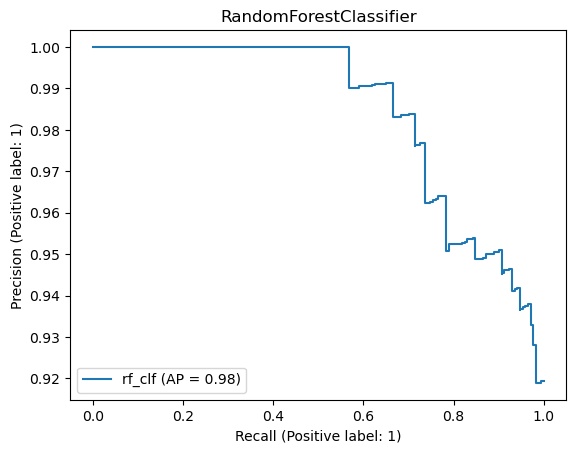

In [70]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_rf, estimator=rf_clf, estimator_name="rf_clf", title="RandomForestClassifier")

### Random Forrest on PCA ###

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

rf_pca_pipe = Pipeline([
    ("pca", PCA(n_components=6)),
    ("randforrest", RandomForestClassifier())
])

y_pred_rf_pca = []

for _ in np.arange(20):
    rf_pca_pipe.fit(X_train, y_train)
    y_pred_rf_pca.append(accuracy_score(y_test, rf_pca_pipe.predict(X_test)))

print(f"Mean accracy: {np.average(y_pred_rf_pca):.3f}, Variance: {np.var(y_pred_rf_pca):.4f}")

Result: <br>
Mean accracy: 0.775, Variance: 0.0001 <br>

Recall for rf_pca_pipe: 0.778
Precision for rf_pca_pipe: 0.957


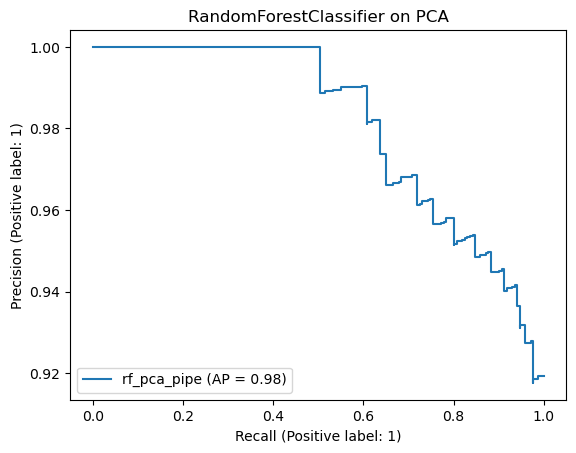

In [72]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_rf_pca, estimator=rf_pca_pipe, estimator_name="rf_pca_pipe", title="RandomForestClassifier on PCA")

### Gradient Boosted Random Forrest ###

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier()
y_pred_gboost = []

for _ in np.arange(20):
    gboost_clf.fit(X_train, y_train)
    y_pred_gboost.append(accuracy_score(y_test, gboost_clf.predict(X_test)))

print(f"Mean accuracy: {np.mean(y_pred_gboost):.3f}, Variance: {np.var(y_pred_gboost):.4f}")

Result: <br>
Mean accuracy: 0.709, Variance: 0.0001 <br>

Recall for gboost_clf: 0.719
Precision for gboost_clf: 0.961


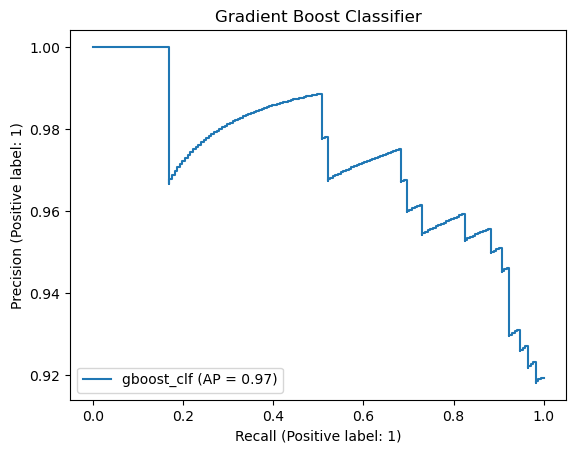

In [74]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_gboost, estimator=gboost_clf, estimator_name="gboost_clf", title="Gradient Boost Classifier")

### Logistic Regression ###

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


log_reg = Pipeline([
    ("ssc", StandardScaler()),
    ("logreg", LogisticRegression(tol= 0.2, max_iter=1000, random_state=random_seed)) 
])

y_pred_log_reg = []
for _ in np.arange(20):
    log_reg.fit(X_train, y_train)
    y_pred_log_reg.append(accuracy_score(y_test, log_reg.predict(X_test)))

print(f"Mean accuracy: {np.mean(y_pred_log_reg):.3f}, Variance: {np.var(y_pred_log_reg):.5f}")

Result: <br>
Score: 0.726 <br>

Recall for log_reg: 0.737
Precision for log_reg: 0.955


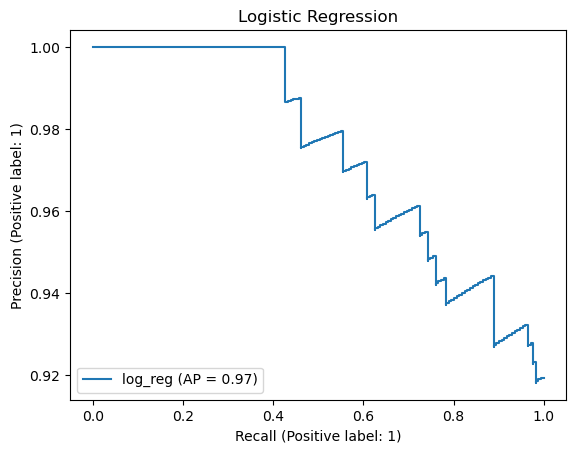

In [76]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_log_reg, estimator=log_reg, estimator_name="log_reg", title="Logistic Regression")

### K-Nearest-Neighbours ###

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = 3
knn_clf = KNeighborsClassifier(n_neighbors=kn)
y_pred = []
for _ in np.arange(20):
    knn_clf.fit(X_train, y_train)
    y_pred.append(accuracy_score(y_test, knn_clf.predict(X_test)))
print(f"Mean accuracy: {np.mean(y_pred):.3f}, Variance: {np.var(y_pred):.4f}")

Result: <br>
Mean accuracy: 0.591, Variance: 0.0000 <br>
This low result (compared to the preceeding algorithms) could be somehow expected, <br>
since we are on a 44 dimensional space (curse of dimensionality problem - most points are far appart ...). <br>

### K-Means ###

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

km_pipe = Pipeline([
    ("pca", PCA()),
    ("km", KMeans())
])

params = {
    "pca__n_components" : np.arange(1,10),
    "km__n_clusters" : np.arange(1, 40),
}

km_grid = GridSearchCV(km_pipe, params, cv=10, n_jobs=-1)
km_grid.fit(X_train, y_train)
km_grid_pred = km_grid.predict(X_test)

print(f"Best parameters: {km_grid.best_params_}")
print(f"Best score: {km_grid.best_score_ :.3f}")
print(f"Best accuracy on test set: {accuracy_score(y_true=y_test, y_pred= km_grid_pred)}")
print(f"Accuracy on training-set: {accuracy_score(y_true=y_train, y_pred= km_grid.predict(X_train)):.3f}")

Result: <br>
Best parameters: {'km__n_clusters': 39, 'pca__n_components': 1} <br>
Best score: -31.296 <br>
Best accuracy on test set: 0.03225806451612903 <br>
Accuracy on training-set: 0.063 <br>
 <br>
... KMeans seems not to work at all on this dataset: even in just one dimension and with many clusters it doesn not do well <br>
I would have expected serious overfitting.

### Logistic Regression on PCA ###

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

log_reg_pipe = Pipeline([
    ("pca", PCA(n_components=10)),
    ("ssc", StandardScaler()),
    ("log_reg", LogisticRegression())
])

y_pred_log_reg_pca=[]
for _ in np.arange(20):
    log_reg_pipe.fit(X_train, y_train)
    y_pred_log_reg_pca.append(accuracy_score(y_test, log_reg_pipe.predict(X_test)))

print(f"Mean accuracy: {np.mean(y_pred_log_reg_pca):.3f}, Variance: {np.var(y_pred_log_reg_pca):.4f}")

confusion_matrix(y_true=y_test, y_pred=log_reg_pipe.predict(X_test))

Result: <br>
Score: 0.753 <br>
array([[  9,   6],  <br>
       [ 40, 131]], dtype=int64) <br>

Recall for log_reg_pipe: 0.766
Precision for log_reg_pipe: 0.956


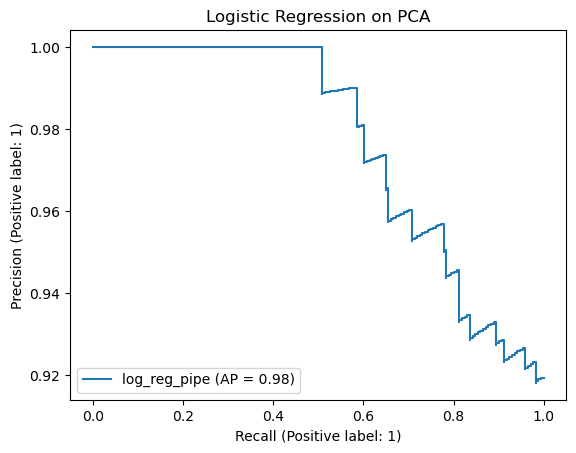

In [80]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_log_reg_pca, estimator=log_reg_pipe, estimator_name="log_reg_pipe", title="Logistic Regression on PCA")

### Support Vector Classifier ###

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_pipe = Pipeline([
    ("ssc", StandardScaler()),
    ("svc", SVC())
])
#svc_pipe.fit(X_train, y_train)
#print(f"Score: {svc_pipe.score(X_test, y_test):.3f}")
#y_pred_svc_pipe = svc_pipe.predict(X_test)

y_pred_svc=[]
for _ in np.arange(20):
    svc_pipe.fit(X_train, y_train)
    y_pred_svc.append(accuracy_score(y_test, svc_pipe.predict(X_test)))

print(f"Mean accuracy: {np.mean(y_pred_svc):.3f}, Variance: {np.var(y_pred_svc):.4f}")
confusion_matrix(y_true=y_test, y_pred=svc_pipe.predict(X_test))

Result: <br>
Mean accuracy: 0.747, Variance: 0.0000 <br>
array([[ 10,   5], <br>
       [ 42, 129]], dtype=int64) <br>

Recall for svc_pipe: 0.754
Precision for svc_pipe: 0.963


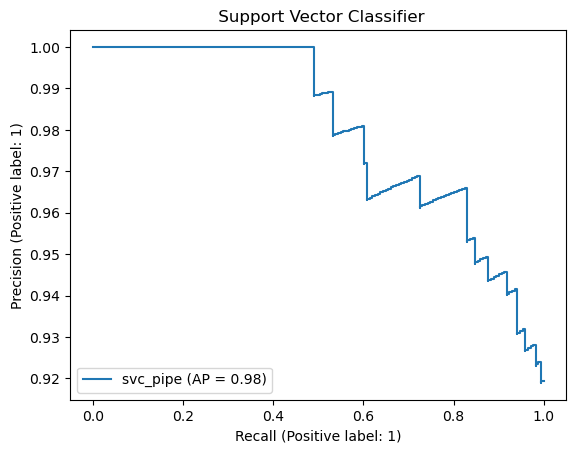

In [92]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_svc_pipe, estimator=svc_pipe, estimator_name="svc_pipe", title=" Support Vector Classifier")

nice improvement by scaling.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

svc_pca_pipe = Pipeline([
    ("ssc1", StandardScaler()),
    ("pca", PCA(n_components=10)),
    #("ssc2", StandardScaler()),
    ("svc", SVC())
])

y_pred_svc_pca=[]
for _ in np.arange(20):
    svc_pca_pipe.fit(X_train, y_train)
    y_pred_svc_pca.append(accuracy_score(y_test, svc_pca_pipe.predict(X_test)))

print(f"Mean accuracy: {np.mean(y_pred_svc_pca):.3f}, Variance: {np.var(y_pred_svc_pca):.4f}")
confusion_matrix(y_true=y_test, y_pred=svc_pca_pipe.predict(X_test))


Result: <br>
without "ssc2":  <br>
Mean accuracy: 0.731, Variance: 0.0000  <br>
array([[ 11,   4],  <br>
       [ 46, 125]], dtype=int64)  <br>
<br>
Support vector classifier does not improve on PCA - on the contrary  <br>
When the second StandardScaler "ssc2" is used, the result degenerates further: <br>
 <br>
with "ssc2":  <br>
Mean accuracy: 0.634, Variance: 0.0000 <br>
array([[ 10,   5], <br>
       [ 63, 108]], dtype=int64) <br>

Recall for svc_pca_pipe: 0.667
Precision for svc_pca_pipe: 0.958


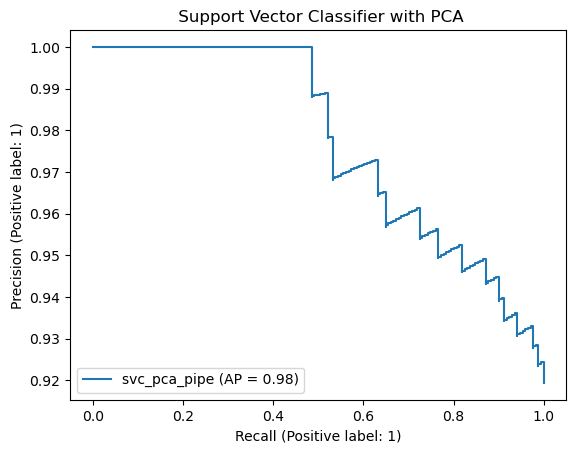

In [22]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_svc_pca, estimator=svc_pca_pipe, estimator_name="svc_pca_pipe", title=" Support Vector Classifier with PCA")

## Best Classifiers after Spot Check: ##
<br>

|Rank|Classifier | Spot-Shot Score |
|----|-----------|-----------------|
|1|Random Forrest on PCA| 0.775 |
|2|Logistic Regression on PCA|0.753|
|3|Random Forrest|0.751|
|4|Support Vector Classifier |0.747| 
|5|Support Vector Classifier on PCA|0.731| 
|6|Logistic Regression |0.726|
|7|Gradient Boosted Forrest on PCA| 0.715 |
|8|KNearestNeighbours|0.591|

## Improvements ##

### Parameter-Tuning for Random Forrest on PCA ###

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

RF_PCA_pipe = Pipeline([
    #("ssc", StandardScaler()),
    ("pca", PCA()),
    ("rf", RandomForestClassifier())
])

params = {
    "pca__n_components" : np.arange(0.1, 0.9, 0.1),
    "rf__n_estimators" : np.arange(100, 200, 10),
    #"rf__max_depth" : [3],
    #"rf__max_samples" : np.arange(1,20),
}


rf_pca_grid = GridSearchCV(RF_PCA_pipe, params, n_jobs=-1, cv=10)
rf_pca_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_pca_grid.best_params_}")
print(f"Best training-score: {rf_pca_grid.best_score_:.3f}")
print(f"Score on test data: {rf_pca_grid.score(X_test, y_test):.3f}")
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=rf_pca_grid.predict(X_test)):.3f}")


Results: <br>
Best parameters: {'pca__n_components': 0.7000000000000001, 'rf__n_estimators': 120} <br>
Best training-score: 0.759 <br>
Score on test data: 0.790 <br>
Accuracy score: 0.790 <br>

### Parameter-Tuning for Gradient Boosted Forrest on PCA ###

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

boost_pipe = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA()),
    ("boost", GradientBoostingClassifier()),
])

params={
    "pca__n_components" : [5],
    "boost__n_estimators" : [60],
    "boost__max_depth" : [2],
    "boost__min_samples_leaf" : [4],
}

boost_grid = GridSearchCV(boost_pipe, params, n_jobs=-1, cv=10)
boost_grid.fit(X_train, y_train)
y_pred_boost_grid = boost_grid.predict(X_test)

print(f"Best parameters: {boost_grid.best_params_}")
print(f"Best training-score: {boost_grid.best_score_:.3f}")
print(f"Score on test data: {boost_grid.score(X_test, y_test):.3f}")
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=boost_grid.predict(X_test)):.3f}")

Results: <br>
Best parameters: {'boost__max_depth': 2, 'boost__min_samples_leaf': 4, 'boost__n_estimators': 60, 'pca__n_components': 5} <br>
Best training-score: 0.811 <br>
Score on test data: 0.780 <br>
Accuracy score: 0.780 <br>

Recall for boost_grid: 0.795
Precision for boost_grid: 0.958


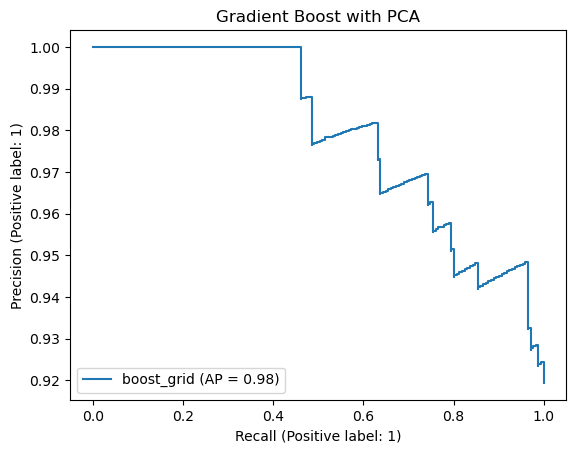

In [25]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_boost_grid, estimator=boost_grid, estimator_name="boost_grid", title="Gradient Boost with PCA")

#### another tunning turn ####

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

boost_pipe = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA()),
    ("boost", GradientBoostingClassifier()),
])

params={
    "pca__n_components" : np.arange(0.5, 0.9, 0.1),
    "boost__n_estimators" : np.arange(60, 150, 10),
    "boost__max_depth" : np.arange(1,8),
    "boost__max_leaf_nodes" : np.arange(2,5),
    "boost__min_samples_leaf" : np.arange(1,5),
    "boost__learning_rate" : np.arange(0.01, 0.1, 0.01)
}

boost_grid = GridSearchCV(boost_pipe, params, n_jobs=-1, cv=10)
boost_grid.fit(X_train, y_train)
y_pred_boost_grid = boost_grid.predict(X_test)

print(f"Best parameters: {boost_grid.best_params_}")
print(f"Best training-score: {boost_grid.best_score_:.3f}")
print(f"Score on test data: {boost_grid.score(X_test, y_test):.3f}")
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=boost_grid.predict(X_test)):.3f}")

Result: <br>
1.<br>
Best parameters: {'boost__max_depth': 5, 'boost__min_samples_leaf': 3, 'boost__n_estimators': 140, 'pca__n_components': 0.6} <br>
Best training-score: 0.848 <br>
Score on test data: 0.763 <br>
Accuracy score: 0.763 <br>
 <br>
Classifier is overfitting.<br>
<br>
2.<br>
Best parameters: {'boost__learning_rate': 0.04, 'boost__max_depth': 3, 'boost__max_leaf_nodes': 4, 'boost__min_samples_leaf': 2, <br>
'boost__n_estimators': 140, 'pca__n_components': 0.6}<br>
Best training-score: 0.836<br>
Score on test data: 0.763<br>
Accuracy score: 0.763<br>
<br>
Still overfitting.<br>
<br>

### Parameter-Tuning for SVC ###

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

svc_pipe = Pipeline([
    ("ssc", StandardScaler()),
    ("svc", SVC(C=3))
])

params = {
    "svc__C" : np.arange(1, 100, 10),
    "svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "svc__degree" : np.arange(2,5),
    "svc__gamma" : ['scale', 'auto'],
}

scoring = { "accuracy" : make_scorer(accuracy_score)}

svc_grid = GridSearchCV(estimator= svc_pipe, param_grid=params, scoring=scoring, refit='accuracy', cv=10, n_jobs=-1)

svc_grid.fit(X_train, y_train)

print(f"Best parameters: {svc_grid.best_params_}")
print(f"Best training-score: {svc_grid.best_score_:.3f}")
print(f"Score on test data: {svc_grid.score(X_test, y_test):.3f}")
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=svc_grid.predict(X_test)):.3f}")
# print(f"cv_results: {svc_grid.cv_results_}")


Results: <br>
Best parameters: {'svc__C': 11, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'} <br>
Best training-score: 0.811 <br>
Score on test data: 0.747 <br>
Accuracy score: 0.747 <br>

Recall for svc_grid: 0.754
Precision for svc_grid: 0.963


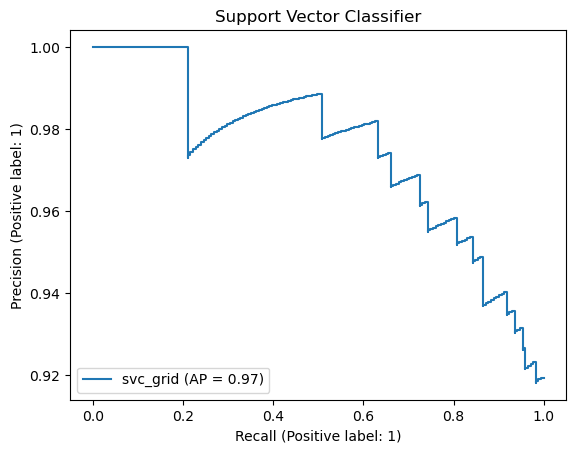

In [94]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_svc_pipe, estimator=svc_grid, estimator_name="svc_grid", title="Support Vector Classifier")

### Logistic Regression on PCA ###

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

log_reg_pipe = Pipeline([
    ("ssc1", StandardScaler()),
    ("pca", PCA()),
    ("ssc2", StandardScaler()),
    ("log_reg", LogisticRegression())
])

params = { "pca__n_components" : np.arange(0.1, 0.9, 0.1)}

log_reg_grid = GridSearchCV(log_reg_pipe, params, cv=10, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
y_pred_grid = log_reg_grid.predict(X_test)

print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best training-score: {log_reg_grid.best_score_:.3f}")
print(f"Score on test data: {log_reg_grid.score(X_test, y_test):.3f}")
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=y_pred_grid):.3f}")

confusion_matrix(y_true=y_test, y_pred=y_pred_grid)

Results: <br>
Best parameters: {'pca__n_components': 0.5} <br>
Best training-score: 0.782 <br>
Score on test data: 0.763 <br>
Accuracy score: 0.763 <br>
array([[ 13,   2], <br>
       [ 42, 129]], dtype=int64) <br>

### K-Nearest-Neighbors ###

Though not a good classifier in the spot-shot, we assume a "curse-of-dimensionality" problem, that would improve by useing a dimension reduction technique like PCA.<br>
Let's do this here:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {
    "pca__n_components" : np.arange(0.15,0.95, 0.1), # percentage of variance retained
    "knn__n_neighbors" : np.arange(1,10),
}

knn_pipe = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA()), 
    ("knn", KNeighborsClassifier())
])

knn_grid = GridSearchCV(estimator = knn_pipe, param_grid=params, n_jobs=-1, cv=10)
knn_grid.fit(X_train, y_train)
y_pred_grid = knn_grid.predict(X_test)

print(f"Best score: {knn_grid.best_score_ :.3f}")
print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best accuracy score: {accuracy_score(y_true=y_test, y_pred=y_pred_grid):.3f}")



Results: <br>
Best score: 0.773<br>
Best parameters: {'knn__n_neighbors': 6, 'pca__n_components': 0.25}<br>
Best accuracy score: 0.694<br>

Recall for knn_grid: 0.696
Precision for knn_grid: 0.960


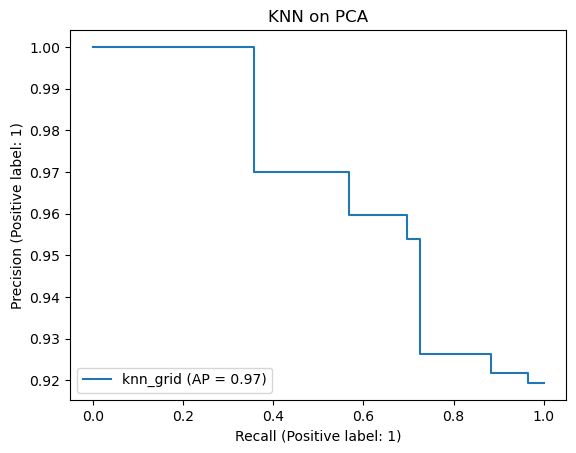

In [62]:
show_precision_recall(X_test=X_test, y_test=y_test, y_pred=y_pred_grid, estimator=knn_grid, estimator_name="knn_grid", title="KNN on PCA")

## Best Classifiers after Prameter-Tuning: ##
<br>

| Rank |Classifier | Spot-Shot Score | After Tuning Accuracy |
|------|-----------|-----------------|-----------------------|
|1|Random Forrest on PCA| 0.775 | 0.790 | 
|2|Gradient Boosted Forrest on PCA| 0.710 |0.780|
|3|Logistic Regression on PCA|0.753|0.763|
|4|Support Vector Classifier|0.747| 0.747 |
|5|Logistic Regression |0.726|-|
|6|KNearestNeighbours|0.591|0.694|



## Voting Classifier Ensemble ##

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


gradient_boost_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("boost", GradientBoostingClassifier(max_depth=2, min_samples_leaf=4, n_estimators=60)),
])

svc_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("svc", SVC(C=11, degree=2, gamma="scale", kernel="rbf", probability=True))
])

log_reg_pipeE = Pipeline([
    ("ssc1", StandardScaler()),
    ("pca", PCA(n_components=0.5)),
    ("ssc2", StandardScaler()),
    ("log_reg", LogisticRegression())
])

knn_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA(n_components=0.25)), 
    ("knn", KNeighborsClassifier(n_neighbors=6))
])

estimators = [
    ("grad", gradient_boost_pipeE),
    ("svc", svc_pipeE),
    ("log", log_reg_pipeE),
    ("knn", knn_pipeE),
]

vote_clf = VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1)
vote_clf.fit(X_train, y_train)
y_pred_vote = vote_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_vote):.3f}")

Result: <br>
Accuracy: 0.747 <br>
The voting-classifier is worse than the best single classifiers involved. It is as good as the svc and better than the knn, but worse than the rest.

#### GridSearch on VotingClassifier ####

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


gradient_boost_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("boost", GradientBoostingClassifier(max_depth=2, min_samples_leaf=4, n_estimators=60)),
])

svc_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("svc", SVC(C=11, degree=2, gamma="scale", kernel="rbf", probability=True))
])

log_reg_pipeE = Pipeline([
    ("ssc1", StandardScaler()),
    ("pca", PCA(n_components=0.5)),
    ("ssc2", StandardScaler()),
    ("log_reg", LogisticRegression())
])

knn_pipeE = Pipeline([
    ("ssc", StandardScaler()),
    ("pca", PCA(n_components=0.25)), 
    ("knn", KNeighborsClassifier(n_neighbors=6))
])

estimators = [
    ("grad", gradient_boost_pipeE),
    ("svc", svc_pipeE),
    ("log", log_reg_pipeE),
    ("knn", knn_pipeE),
]

params = {
    
}
params={
    "grad__pca__n_components" : [5],
    "grad__boost__n_estimators" : [60],
    "grad__boost__max_depth" : [2],
    "grad__boost__min_samples_leaf" : [4],
    "svc__svc__C" : np.arange(1, 100, 10),
    "svc__svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "svc__svc__degree" : np.arange(2,5),
    "svc__svc__gamma" : ['scale', 'auto'],
    "log__pca__n_components" : np.arange(0.1, 0.9, 0.1),
    "knn__pca__n_components" : np.arange(0.15,0.95, 0.1),
    "knn__knn__n_neighbors" : np.arange(1,10),
}
    
vote_clf = VotingClassifier(estimators=estimators, voting="soft")

vote_grid = GridSearchCV(vote_clf, params, cv=5, n_jobs=-1)
vote_grid.fit(X_train, y_train)
y_pred_vote = vote_grid.predict(X_test)

print(f"Best score: {vote_grid.best_score_ :.3f}")
print(f"Best parameters: {vote_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_vote):.3f}")

Result: <br>
Time: 26m43.3s <br>
 <br>
Best score: 0.823 <br>
Best parameters: {'grad__boost__max_depth': 2, 'grad__boost__min_samples_leaf': 4, 'grad__boost__n_estimators': 60, 'grad__pca__n_components': 5,  <br>
'knn__knn__n_neighbors': 3, 'knn__pca__n_components': 0.55,  <br>
'log__pca__n_components': 0.1,  <br>
'svc__svc__C': 11, 'svc__svc__degree': 3, 'svc__svc__gamma': 'scale', 'svc__svc__kernel': 'rbf'} <br>
 <br>
Accuracy: 0.747 <br>

#### Summary on VotingClassifier ####

The voting classifier is worse than the better part of the in-going classifiers. I don't understand completely why - one idea: a detailed analysis of which  <br> classifieris voting/ predictig what for each sample would help - it seems, that the classifier do badly on approximately the same samples and some do worse on  <br> samples that the better classifiers are good at. <br>
The computing resources to grid-search the voting classifier are rather high. <br>
 <br>

## Lessons Learned: ##
- KNearestNeighbours is very dependend on dimension - demension reduction like PCA helps
- PCA is very usefull in a pipeline for random-forrest and boosted-random-forrest classifier as well as for logistic regression
- Standard-scaling before PCA (when used in a pipeline) is usefull
- PCA does NOT help with SVC
- Random-forrests tend to overfit: first use default settings, then try to regularize by restricting PCA-components (when used), max_depth and min_samples_leaf

## To Do: ##
- in GridsearchCV: which parameter-set belongs to which mean_accuracy (or mean_score)? <- this is necessary to know for refined param tuning
- use different cluster algorithm than KMeans
- use this cluster algorithm as preparation step for logistic-regression, support vector classifier
- use a neural net for this task
- write-up findings